# Landscapes depending on various activation functions
Sampling the loss manifold using GLA 2nd


In [2]:
import sys
sys.path.append('/Users/zofia/packages/DataDrivenSampler-0.3/lib/python3.6/site-packages')

In [3]:
from DataDrivenSampler.models.model import model
import numpy as np
import pandas as pd 

activationFunctions = {"linear", "tanh", "relu", "relu6"}

for act in activationFunctions:
    
    print("*****************************************")
    print("Sampling with activation function "+act)
    print("*****************************************")
    FLAGS = model.setup_parameters(
        batch_data_files=["dataset-twoclusters.csv"],
        batch_size=500,
        max_steps=10000,
        output_activation=act,
        sampler="GeometricLangevinAlgorithm_2ndOrder",
        seed=426,
        step_width=1e-2
    )
    nn = model(FLAGS)
    nn.init_network(None, setup="sample")
    run_info, trajectory = nn.sample(return_run_info=True, \
      return_trajectories=True)
    nn.finish()
    print("Sampling done")
    
   
    df = pd.DataFrame(trajectory)
    df.to_csv("run_gla2_ActF_"+act+".csv")


/Users/zofia/miniconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


*****************************************
Sampling with activation function relu
*****************************************
Parsing ['dataset-twoclusters.csv']
(TensorShape([Dimension(None), Dimension(2)]), TensorShape([Dimension(None), Dimension(1)]))
(tf.float32, tf.int32)
Picking as input columns: ['x1', 'x2']
x is (?, 2)
Creating nn layer output with 2, 1
Setting up output files for sample
Weight: <tf.Variable 'output/weights/Variable:0' shape=(2, 1) dtype=float64_ref>
Placeholder: Tensor("Placeholder:0", shape=(2, 1), dtype=float64)
Weight: <tf.Variable 'output/biases/Variable:0' shape=(1,) dtype=float64_ref>
Placeholder: Tensor("Placeholder_1:0", shape=(1,), dtype=float64)
Starting to sample
SAMPLED.
Sampling done
*****************************************
Sampling with activation function linear
*****************************************
Parsing ['dataset-twoclusters.csv']
(TensorShape([Dimension(None), Dimension(2)]), TensorShape([Dimension(None), Dimension(1)]))
(tf.float32, tf.i

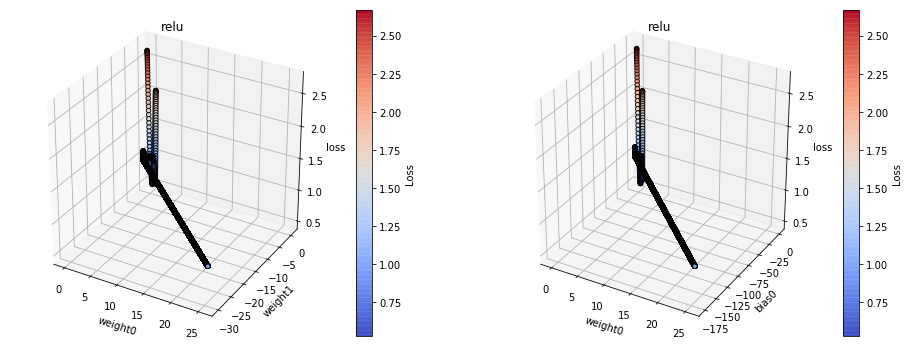

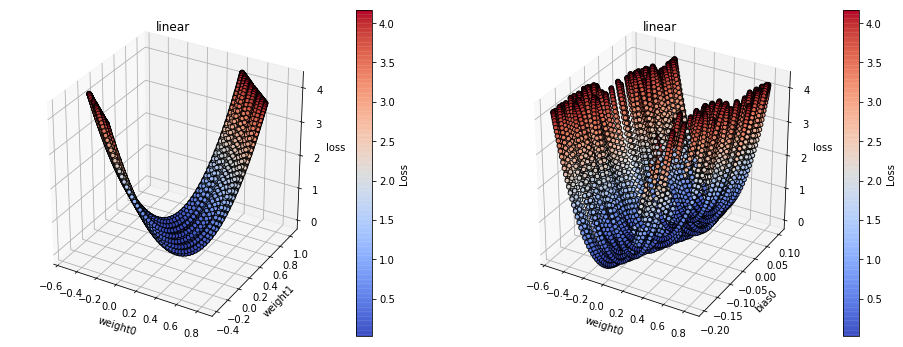

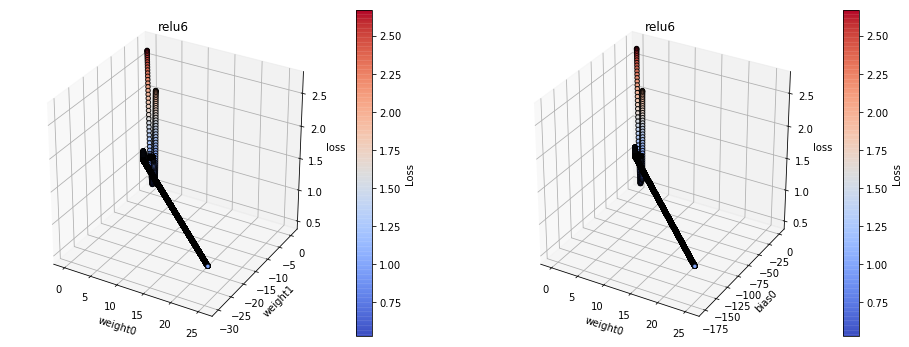

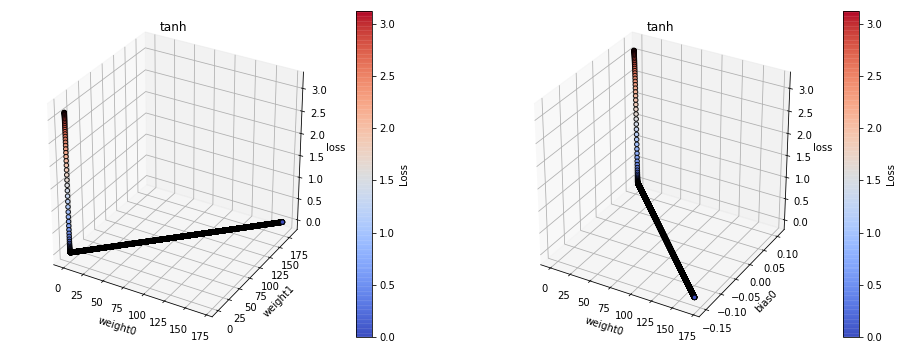

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from matplotlib import cm

for act in activationFunctions:

    df_run = pd.read_csv("run_gla2_ActF_"+act+".csv", sep=',', header=0)

    loss=np.squeeze(np.asarray(df_run.loc[:,['loss']]))
    step=np.squeeze(np.asarray(df_run.loc[:,['step']]))
    weights=np.asarray(df_run.loc[:,['weight0', 'weight1', 'bias0']])
    run=np.asarray(df_run.loc[:,['step','loss','kinetic_energy', 'total_energy']])
    
    fig = plt.figure(figsize = (16,6))
    ax = fig.add_subplot(121, projection='3d')
    axf = ax.scatter(weights[:,0], weights[:,1], loss, c=loss, alpha=0.90, edgecolors='none', depthshade=True,  cmap=cm.coolwarm)
    cbar = fig.colorbar(axf)
    cbar.set_label('Loss')
    ax.set_xlabel(df_run.axes[1][-3])
    ax.set_ylabel(df_run.axes[1][-2])
    ax.set_zlabel(df_run.axes[1][2])
    ax.set_title(act)

    ax = fig.add_subplot(122, projection='3d')
    axf = ax.scatter(weights[:,0], weights[:,2], loss, c=loss, alpha=0.90, edgecolors='none', depthshade=True,  cmap=cm.coolwarm)
    cbar = fig.colorbar(axf)
    cbar.set_label('Loss')
    ax.set_xlabel(df_run.axes[1][-3])
    ax.set_ylabel(df_run.axes[1][-1])
    ax.set_zlabel(df_run.axes[1][2])
    ax.set_title(act)
    
    plt.show()


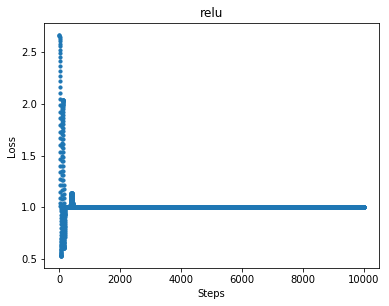

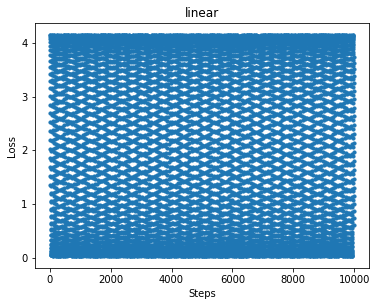

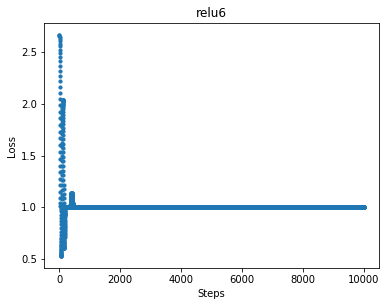

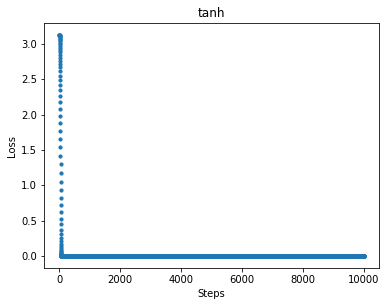

In [11]:
for act in activationFunctions:

    df_run = pd.read_csv("run_gla2_ActF_"+act+".csv", sep=',', header=0)

    loss=np.squeeze(np.asarray(df_run.loc[:,['loss']]))
    step=np.squeeze(np.asarray(df_run.loc[:,['step']]))
    weights=np.asarray(df_run.loc[:,['weight0', 'weight1', 'bias0']])
    run=np.asarray(df_run.loc[:,['step','loss','kinetic_energy', 'total_energy']])
    
    fig = plt.figure(figsize = (6,4.5))
    ax = fig.add_subplot(111)
    ax.scatter(step, loss,  s=10)
    ax.set_xlabel('Steps')
    ax.set_ylabel('Loss')
    ax.set_title(act)

    plt.show()
#plt.legend(activationFunctions)